In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# About the dataset

##### Imagine that you are medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to onen of 5 medications, Drug A, Drug B, Drug C , Drug x and y.

##### Part of your job is to build a model to find out which drug might be appropiate for a future patient with the same illness. The features of this dataset Are Age, Sex, Blood Pressure, and the Cholestrol of the patients. and the target is the drug that each patient responded to.

##### It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

In [2]:
my_data = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\week9\drug.csv" , index_col=0)
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
#Practive
#What is the size of data?

my_data.shape

(200, 6)

In [4]:
#pre-processing data
#using my_data as the drug.csv data read by pandas, declare theh following varibles:
# X as the feature matrix (data of my_data)
# y as the responsive vector(target)

#remove the column containing the target name since it doesn't contain numeric values.

X = my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [5]:
#As you may figure out, some features in this dataset are 
#categorical, such as Sex or BP, unfortunately, 
#Sklearn Decision Trees does not handle categorica variables. 
#We can still convert these features to numerical values using pandas.get_dummies to convert the categorical variable into dummy/indicator varibles

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
#Now we can fill the target varible

y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Setting up the decision Tree

In [7]:
#We will be using train/test split on our decision tree.Let's import
#train_test_split from sklearn.cross_validation.

from sklearn.model_selection import train_test_split

In [8]:
#Now train_test_split will return 4 diff parameters, we name them:
#X_trainset, X_testset,y_trainset, y_testset

#The train_tes_split will need the parameters:
#X,y,test_size= 0.3, and random_state=3.

#The X and y are the arrays required before the split, the test_size represents the ratio of the testing data set,and the random_state ensures that we obtain the same split

X_trainset, X_testset,y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3) 

In [9]:
#Practice
#print the shape of X_trainset and y_trainset.Ensure that the dimensions match.

print('Shape of x training set{}'.format(X_trainset.shape),
      '&','Size of Y training se{}'.format(y_trainset.shape))

Shape of x training set(140, 5) & Size of Y training se(140,)


### Modeling

In [10]:
#We will first create an instance of the DecisionTreeClassifier called drugTree
#Inside of the classifier, specify criterion='entropy' so we can see the information gain of each node.

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree #it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
#Next we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

In [12]:
#Let's make some predictions on the testing dataset and store it into a varible called predTree.

predTree= drugTree.predict(X_testset)

In [13]:
#print predTree and y_testset

print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


### Evaluation

In [14]:
#Next, let import metrics from sklearn and check the accuracy of our model

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTress's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTress's Accuracy:  0.9833333333333333


### Visualization

In [15]:
#Let's visulize the tree

#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

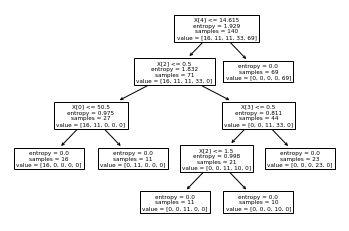

In [16]:
tree.plot_tree(drugTree)
plt.show()

### Import packages and data set
## Guided python KNN

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\week9\Classified Data.csv",index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [19]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


## Check sebaran fiturnya

In [20]:
l=list(df.columns)
l[0:len(l)-2]

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE']

### jalankan loop untuk mengeluarkan boxlot dari fitur 0 dan 1 TARGET CLASS

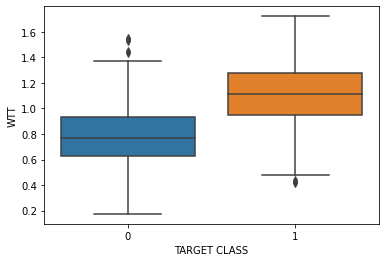

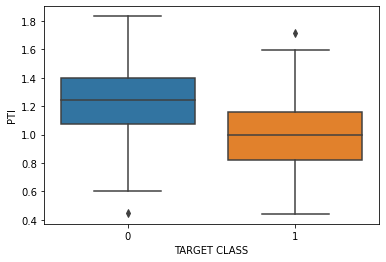

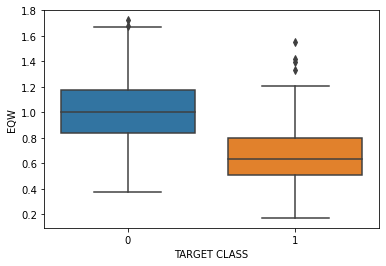

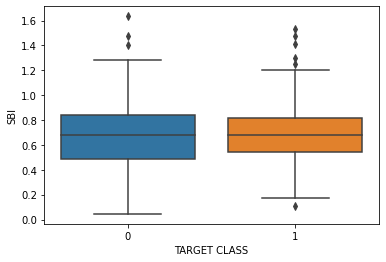

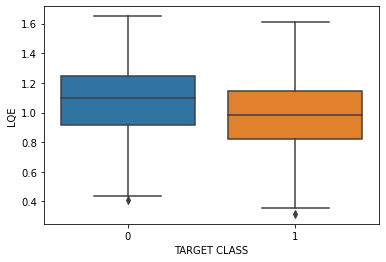

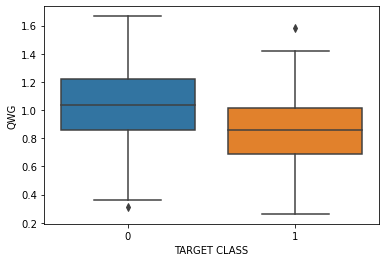

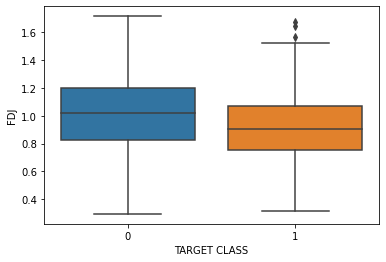

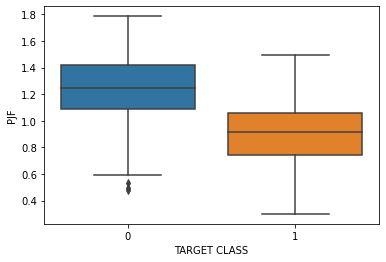

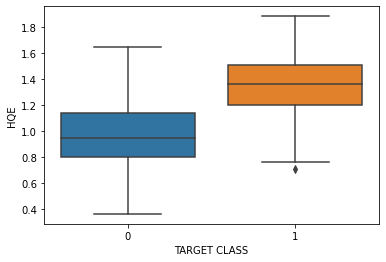

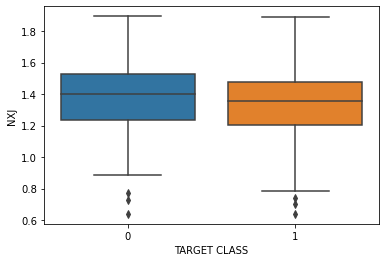

<Figure size 432x288 with 0 Axes>

In [21]:
for i in range(len(l)-1):
    sns.boxplot(x='TARGET CLASS',y=l[i], data=df)
    plt.figure()

# Scaling fitur menggunakan sklearn

## skale estimator

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

### fit fitur data ke estimator

In [23]:
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [24]:
df_feat= pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Melatih/split test, model fit dan prediksi

In [25]:
from sklearn.model_selection import train_test_split
X = df_feat
y= df['TARGET CLASS']
X_train, X_test, y_train, y_test=train_test_split(scaled_features,df['TARGET CLASS'],
                                                  test_size=0.50, random_state=101)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred =knn.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

### Evaluasi dari klasifikasi

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

[[233  17]
 [ 24 226]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       250
           1       0.93      0.90      0.92       250

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [30]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.082


### milih 'K'

In [31]:
error_rate=[]

#will take some time
for i in range(1,60):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

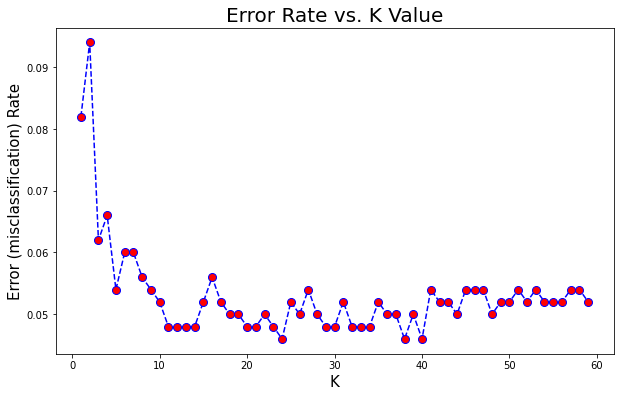

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Error (misclassification) Rate', fontsize=15)

# SVM

In [33]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
#Load data from CSV file

cell_df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\week9\cancer.csv" , index_col=0)
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


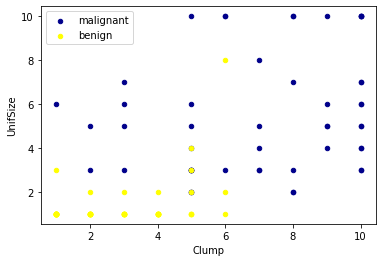

In [35]:
#the ID field contains the patient identifiers. The characteristic of the cell samples from each samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10.with 1 being the closest to benign

#The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign(values =2) or malignant(value =4).

#Lets look at the distribution of the classes based on Clump thickness an uniformity of cell size:

ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter',
                                              x='Clump',
                                              y='UnifSize',
                                              color='DarkBlue',
                                              label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter',
                                         x='Clump',
                                         y='UnifSize',
                                         color='Yellow',
                                         label='benign',
                                         ax=ax);
plt.show()


## Data pre-processing and selection

In [36]:
#let's first look a columns data type, udah jadi integer secara default

cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [37]:
# it looks like the BareNuc column includes some values that are not numerical. We can drop those rows:

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [38]:
feature_df = cell_df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [39]:
#we want the model to predict the value of class(that is, benign(=2) or malignant(=4).As field can have one of only two possible values. we need to change its measurement level to reflect this.

cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

## Train/Test Dataset

In [40]:
#okay, we split our dataset into train an test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set: ', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape)

Train set:  (546, 9) (546,)
Test set:  (137, 9) (137,)


## Modeling (SVM with Scikit-learn

In [41]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [42]:
#after being fitted, the model can then be used to predict new values

yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

### Evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [44]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


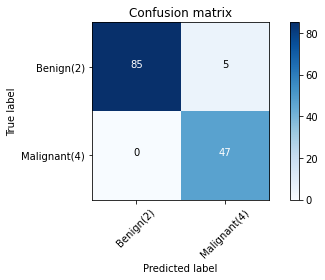

In [45]:
#compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)',
                                           'Malignant(4)'],
                     normalize= False, title='Confusion matrix')

In [46]:
#you can also easily use the f1_score from sklearn library:

from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

In [47]:
#Lets try jaccard index for accuracy:

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average="micro")

0.9295774647887324

## Practice

In [48]:
#can you rebuild the model, but this time with a_linear_kernel? you can use_kernel='linear'_option, when you define the svm. How the accuracy
#change with the new kernel function?

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train)
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2, average="micro"))

Avg F1-score: 0.9639
Jaccard score: 0.9296


## EXERCISE TAKE HOME

In [49]:
#run 3 model KNN, SVM, Decision Tree

LOAN = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\week9\loan_data.csv")
LOAN.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [50]:
LOAN.shape

(9578, 14)

In [51]:
X = LOAN[['purpose','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']].values
X[0:13]

array([['debt_consolidation', 0.1189, 829.1, 11.35040654, 19.48, 737,
        5639.958333, 28854, 52.1, 0, 0, 0, 0],
       ['credit_card', 0.1071, 228.22, 11.08214255, 14.29, 707, 2760.0,
        33623, 76.7, 0, 0, 0, 0],
       ['debt_consolidation', 0.1357, 366.86, 10.37349118, 11.63, 682,
        4710.0, 3511, 25.6, 1, 0, 0, 0],
       ['debt_consolidation', 0.1008, 162.34, 11.35040654, 8.1, 712,
        2699.958333, 33667, 73.2, 1, 0, 0, 0],
       ['credit_card', 0.1426, 102.92, 11.29973224, 14.97, 667, 4066.0,
        4740, 39.5, 0, 1, 0, 0],
       ['credit_card', 0.0788, 125.13, 11.90496755, 16.98, 727,
        6120.041667, 50807, 51.0, 0, 0, 0, 0],
       ['debt_consolidation', 0.1496, 194.02, 10.71441777, 4.0, 667,
        3180.041667, 3839, 76.8, 0, 0, 1, 1],
       ['all_other', 0.1114, 131.22, 11.00209984, 11.08, 722, 5116.0,
        24220, 68.6, 0, 0, 0, 1],
       ['home_improvement', 0.1134, 87.19, 11.40756495, 17.25, 682,
        3989.0, 69909, 51.1, 1, 0, 0, 0],
    

In [52]:
df_new = LOAN[['purpose']]. drop_duplicates()
df_new

,purpose
0,debt_consolidation
1,credit_card
7,all_other
8,home_improvement
13,small_business
15,major_purchase
46,educational


In [53]:
from sklearn import preprocessing
le_purpose = preprocessing.LabelEncoder()
le_purpose.fit(['debt_consolidation','credit_card','all_other','home_improvement','small_business','major_purchase','educational'])
X[:,0] = le_purpose.transform(X[:,0])

X[0:13]

array([[2, 0.1189, 829.1, 11.35040654, 19.48, 737, 5639.958333, 28854,
        52.1, 0, 0, 0, 0],
       [1, 0.1071, 228.22, 11.08214255, 14.29, 707, 2760.0, 33623, 76.7,
        0, 0, 0, 0],
       [2, 0.1357, 366.86, 10.37349118, 11.63, 682, 4710.0, 3511, 25.6,
        1, 0, 0, 0],
       [2, 0.1008, 162.34, 11.35040654, 8.1, 712, 2699.958333, 33667,
        73.2, 1, 0, 0, 0],
       [1, 0.1426, 102.92, 11.29973224, 14.97, 667, 4066.0, 4740, 39.5,
        0, 1, 0, 0],
       [1, 0.0788, 125.13, 11.90496755, 16.98, 727, 6120.041667, 50807,
        51.0, 0, 0, 0, 0],
       [2, 0.1496, 194.02, 10.71441777, 4.0, 667, 3180.041667, 3839,
        76.8, 0, 0, 1, 1],
       [0, 0.1114, 131.22, 11.00209984, 11.08, 722, 5116.0, 24220, 68.6,
        0, 0, 0, 1],
       [4, 0.1134, 87.19, 11.40756495, 17.25, 682, 3989.0, 69909, 51.1,
        1, 0, 0, 0],
       [2, 0.1221, 84.12, 10.20359214, 10.0, 707, 2730.041667, 5630,
        23.0, 1, 0, 0, 0],
       [2, 0.1347, 360.43, 10.4341158, 22.09, 6

In [54]:
y = LOAN['credit.policy']
y[0:13]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: credit.policy, dtype: int64

## Setting up the decision Tree

In [55]:
#We will be using train/test split on our decision tree.Let's import
#train_test_split from sklearn.cross_validation.

from sklearn.model_selection import train_test_split

In [56]:
#Now train_test_split will return 4 diff parameters, we name them:
#X_trainset, X_testset,y_trainset, y_testset

#The train_tes_split will need the parameters:
#X,y,test_size= 0.3, and random_state=3.

#The X and y are the arrays required before the split, the test_size represents the ratio of the testing data set,and the random_state ensures that we obtain the same split

X_trainset, X_testset,y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3) 

In [57]:
#Practice
#print the shape of X_trainset and y_trainset.Ensure that the dimensions match.

print('Shape of x training set{}'.format(X_trainset.shape),
      '&','Size of Y training se{}'.format(y_trainset.shape))

Shape of x training set(6704, 13) & Size of Y training se(6704,)


### Modeling

In [58]:
#We will first create an instance of the DecisionTreeClassifier called drugTree
#Inside of the classifier, specify criterion='entropy' so we can see the information gain of each node.

loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree #it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
#Next we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

loanTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

In [60]:
#Let's make some predictions on the testing dataset and store it into a varible called predTree.

predTree= loanTree.predict(X_testset)
predTree

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [61]:
#print predTree and y_testset

print(predTree[0:13])
print(y_testset[0:13])

[1 1 1 1 1 1 1 1 1 1 1 1 1]
6507    1
810     1
5687    1
153     1
6084    1
2262    1
6686    1
6412    1
24      1
798     1
6468    1
213     1
7014    1
Name: credit.policy, dtype: int64


### Evaluation

In [62]:
#Next, let import metrics from sklearn and check the accuracy of our model

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTress's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTress's Accuracy:  0.9739039665970772


### Visualization

In [63]:
#Let's visulize the tree

#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

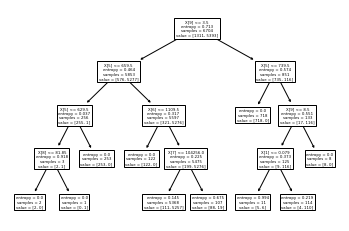

In [64]:
tree.plot_tree(loanTree)
plt.show()

### Import packages and data set
## Guided python KNN

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\week9\loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [67]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [68]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [69]:
X = LOAN[['purpose','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']].values
X[0:13]

array([['debt_consolidation', 0.1189, 829.1, 11.35040654, 19.48, 737,
        5639.958333, 28854, 52.1, 0, 0, 0, 0],
       ['credit_card', 0.1071, 228.22, 11.08214255, 14.29, 707, 2760.0,
        33623, 76.7, 0, 0, 0, 0],
       ['debt_consolidation', 0.1357, 366.86, 10.37349118, 11.63, 682,
        4710.0, 3511, 25.6, 1, 0, 0, 0],
       ['debt_consolidation', 0.1008, 162.34, 11.35040654, 8.1, 712,
        2699.958333, 33667, 73.2, 1, 0, 0, 0],
       ['credit_card', 0.1426, 102.92, 11.29973224, 14.97, 667, 4066.0,
        4740, 39.5, 0, 1, 0, 0],
       ['credit_card', 0.0788, 125.13, 11.90496755, 16.98, 727,
        6120.041667, 50807, 51.0, 0, 0, 0, 0],
       ['debt_consolidation', 0.1496, 194.02, 10.71441777, 4.0, 667,
        3180.041667, 3839, 76.8, 0, 0, 1, 1],
       ['all_other', 0.1114, 131.22, 11.00209984, 11.08, 722, 5116.0,
        24220, 68.6, 0, 0, 0, 1],
       ['home_improvement', 0.1134, 87.19, 11.40756495, 17.25, 682,
        3989.0, 69909, 51.1, 1, 0, 0, 0],
    

In [70]:
from sklearn import preprocessing
le_purpose = preprocessing.LabelEncoder()
le_purpose.fit(['debt_consolidation','credit_card','all_other','home_improvement','small_business','major_purchase','educational'])
X[:,0] = le_purpose.transform(X[:,0])

X[0:13]

array([[2, 0.1189, 829.1, 11.35040654, 19.48, 737, 5639.958333, 28854,
        52.1, 0, 0, 0, 0],
       [1, 0.1071, 228.22, 11.08214255, 14.29, 707, 2760.0, 33623, 76.7,
        0, 0, 0, 0],
       [2, 0.1357, 366.86, 10.37349118, 11.63, 682, 4710.0, 3511, 25.6,
        1, 0, 0, 0],
       [2, 0.1008, 162.34, 11.35040654, 8.1, 712, 2699.958333, 33667,
        73.2, 1, 0, 0, 0],
       [1, 0.1426, 102.92, 11.29973224, 14.97, 667, 4066.0, 4740, 39.5,
        0, 1, 0, 0],
       [1, 0.0788, 125.13, 11.90496755, 16.98, 727, 6120.041667, 50807,
        51.0, 0, 0, 0, 0],
       [2, 0.1496, 194.02, 10.71441777, 4.0, 667, 3180.041667, 3839,
        76.8, 0, 0, 1, 1],
       [0, 0.1114, 131.22, 11.00209984, 11.08, 722, 5116.0, 24220, 68.6,
        0, 0, 0, 1],
       [4, 0.1134, 87.19, 11.40756495, 17.25, 682, 3989.0, 69909, 51.1,
        1, 0, 0, 0],
       [2, 0.1221, 84.12, 10.20359214, 10.0, 707, 2730.041667, 5630,
        23.0, 1, 0, 0, 0],
       [2, 0.1347, 360.43, 10.4341158, 22.09, 6

In [71]:
df['purpose'] = X[:,0]

In [72]:
df['purpose'] = df['purpose'].astype('float')
df.dtypes

credit.policy          int64
purpose              float64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [73]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2.0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1.0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2.0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2.0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1.0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2.0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4.0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


## Check sebaran fiturnya

In [74]:
l=list(df.columns)
l[0:len(l)]

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

### jalankan loop untuk mengeluarkan boxlot dari fitur 0 dan 1 TARGET CLASS

In [75]:
df_new2 = LOAN[['not.fully.paid']]. drop_duplicates()
df_new2

,not.fully.paid
0,0
6,1


In [76]:
df_new3 = LOAN[['pub.rec']]. drop_duplicates()
df_new3

,pub.rec
0,0
6,1
232,2
3461,3
7276,4
8324,5


In [77]:
df_new4 = LOAN[['delinq.2yrs']]. drop_duplicates()
df_new4

,delinq.2yrs
0,0
4,1
25,2
131,4
205,3
689,5
1525,6
7789,13
8118,7
8234,8


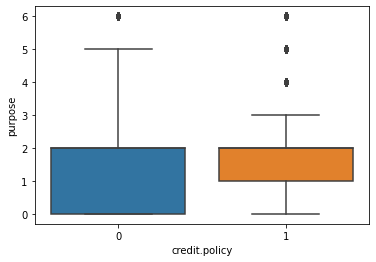

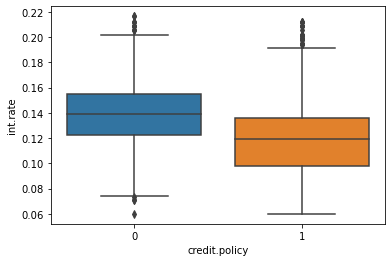

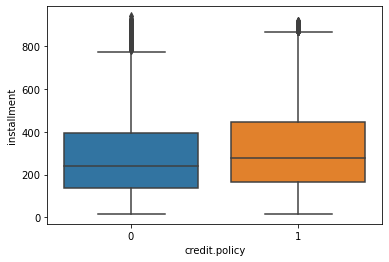

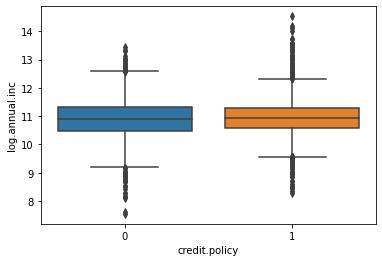

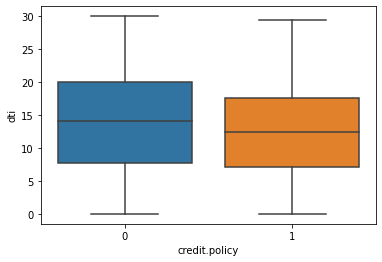

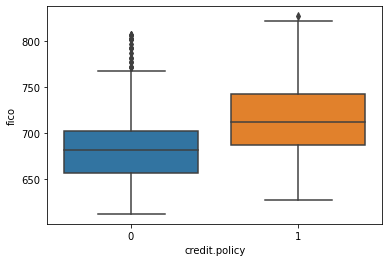

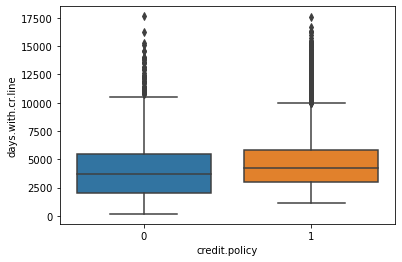

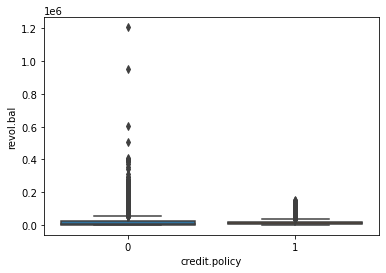

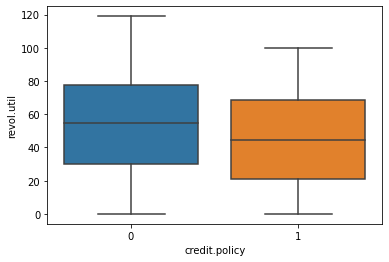

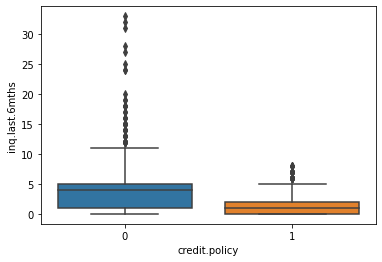

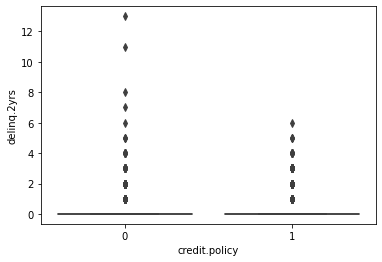

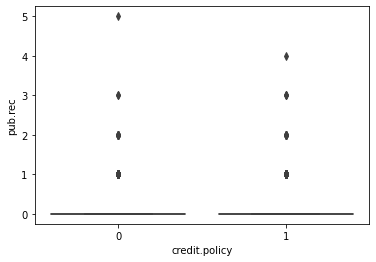

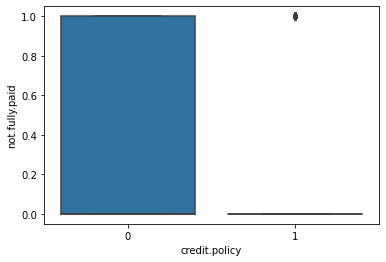

<Figure size 432x288 with 0 Axes>

In [78]:
for i in range(len(l)):
    sns.boxplot(x='credit.policy',y=l[i+1], data=df)
    plt.figure()
    
    if i+1 == len(l)-1:
        break

# Scaling fitur menggunakan sklearn

## skale estimator

In [79]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

### fit fitur data ke estimator

In [80]:
scaler.fit(df.drop('credit.policy', axis=1))
scaled_features = scaler.transform(df.drop('credit.policy',axis=1))

In [81]:
df_feat= pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.033176,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524
1,-0.559665,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524
2,0.033176,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524
3,0.033176,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524
4,-0.559665,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524


## Melatih/split test, model fit dan prediksi

In [82]:
from sklearn.model_selection import train_test_split
X = df_feat
y= df['credit.policy']
X_train, X_test, y_train, y_test=train_test_split(scaled_features,df['credit.policy'],
                                                  test_size=0.50, random_state=101)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [84]:
pred1 =knn.predict(X_test)
pred1

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

### Evaluasi dari klasifikasi

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print(conf_mat)

ValueError: Found input variables with inconsistent numbers of samples: [4789, 500]

In [86]:
print(classification_report(y_test,pred))

ValueError: Found input variables with inconsistent numbers of samples: [4789, 500]

In [87]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

C:\Users\Darren\AppData\Local\Temp\ipykernel_10872\3483757707.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print("Misclassification error rate:",round(np.mean(pred!=y_test),3))


ValueError: ('Lengths must match to compare', (4789,), (500,))

### milih 'K'

In [88]:
error_rate=[]

#will take some time
for i in range(1,60):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

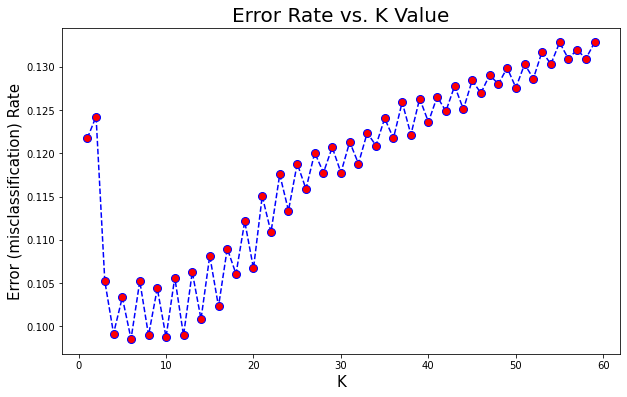

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Error (misclassification) Rate', fontsize=15)

# SVM

In [90]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [91]:
#Load data from CSV file

cell_df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\week9\loan_data.csv")
cell_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


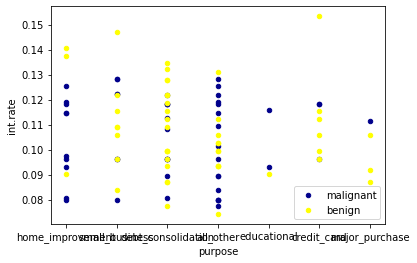

In [92]:
#The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign(values =2) or malignant(value =4).
ax = cell_df[cell_df['inq.last.6mths'] == 4][0:50].plot(kind='scatter',
                                              x='purpose',
                                              y='int.rate',
                                              color='DarkBlue',
                                              label='malignant');
cell_df[cell_df['inq.last.6mths'] == 2][0:50].plot(kind='scatter',
                                         x='purpose',
                                         y='int.rate',
                                         color='Yellow',
                                         label='benign',
                                         ax=ax);
plt.show()


## Data pre-processing and selection

In [93]:
#let's first look a columns data type, udah jadi integer secara default

cell_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [94]:

cell_df = cell_df[pd.to_numeric(cell_df['int.rate'], errors='coerce').notnull()]
cell_df['int.rate'] = cell_df['int.rate'].astype('int')
cell_df.dtypes

credit.policy          int64
purpose               object
int.rate               int32
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [95]:
feature_df = cell_df[['purpose','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']]
X = np.asarray(feature_df)
X[0:13]

array([['debt_consolidation', 0, 829.1, 11.35040654, 19.48, 737,
        5639.958333, 28854, 52.1, 0, 0, 0, 0],
       ['credit_card', 0, 228.22, 11.08214255, 14.29, 707, 2760.0, 33623,
        76.7, 0, 0, 0, 0],
       ['debt_consolidation', 0, 366.86, 10.37349118, 11.63, 682, 4710.0,
        3511, 25.6, 1, 0, 0, 0],
       ['debt_consolidation', 0, 162.34, 11.35040654, 8.1, 712,
        2699.958333, 33667, 73.2, 1, 0, 0, 0],
       ['credit_card', 0, 102.92, 11.29973224, 14.97, 667, 4066.0, 4740,
        39.5, 0, 1, 0, 0],
       ['credit_card', 0, 125.13, 11.90496755, 16.98, 727, 6120.041667,
        50807, 51.0, 0, 0, 0, 0],
       ['debt_consolidation', 0, 194.02, 10.71441777, 4.0, 667,
        3180.041667, 3839, 76.8, 0, 0, 1, 1],
       ['all_other', 0, 131.22, 11.00209984, 11.08, 722, 5116.0, 24220,
        68.6, 0, 0, 0, 1],
       ['home_improvement', 0, 87.19, 11.40756495, 17.25, 682, 3989.0,
        69909, 51.1, 1, 0, 0, 0],
       ['debt_consolidation', 0, 84.12, 10.203592

In [96]:
#we want the model to predict the value of class(that is, benign(=2) or malignant(=4).As field can have one of only two possible values. we need to change its measurement level to reflect this.

cell_df['credit.policy'] = cell_df['credit.policy'].astype('int')
y = np.asarray(cell_df['credit.policy'])
y [0:5]

array([1, 1, 1, 1, 1])

## Train/Test Dataset

In [97]:
#okay, we split our dataset into train an test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set: ', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape)

Train set:  (7662, 13) (7662,)
Test set:  (1916, 13) (1916,)


## Modeling (SVM with Scikit-learn

In [98]:
df['purpose'] = df['purpose'].astype('float')
df.dtypes

credit.policy          int64
purpose              float64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [99]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'debt_consolidation'

In [100]:
#after being fitted, the model can then be used to predict new values

yhat = clf.predict(X_test)
yhat [0:5]

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Evaluation

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [102]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        

In [103]:
#compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)',
                                           'Malignant(4)'],
                     normalize= False, title='Confusion matrix')

ValueError: Found input variables with inconsistent numbers of samples: [1916, 137]

In [104]:
#you can also easily use the f1_score from sklearn library:

from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

ValueError: Found input variables with inconsistent numbers of samples: [1916, 137]

In [105]:
#Lets try jaccard index for accuracy:

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average="micro")

ValueError: Found input variables with inconsistent numbers of samples: [1916, 137]